In [29]:
#Here I have imported the needed libraries
# I will also demonstrate simple linear Regression 
from collections import Counter
from pprint import pprint
import openpyxl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
from sklearn.linear_model import LinearRegression
import watermark

In [3]:
plt.style.use('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [27]:
#Now we start by loading the AAPL stock dataset
data = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/AAPL.csv', parse_dates=['Date'], index_col=0)

data.rolling(8).mean().dropna() #To generate 8 day average values



Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-23    0.497210    0.498884    0.496652    0.496652    0.393517   
1980-12-24    0.505580    0.507254    0.505022    0.505022    0.400149   
1980-12-26    0.523716    0.525670    0.523438    0.523438    0.414740   
1980-12-29    0.547433    0.549665    0.547433    0.547433    0.433753   
1980-12-30    0.568359    0.570312    0.568080    0.568080    0.450113   
1980-12-31    0.585379    0.587053    0.584821    0.584821    0.463377   
1981-01-02    0.599330    0.601283    0.598772    0.598772    0.474431   
1981-01-05    0.608817    0.610491    0.607980    0.607980    0.481727   
1981-01-06    0.612165    0.613560    0.611049    0.611049    0.484158   
1981-01-07    0.608817    0.609933    0.607422    0.607422    0.481285   
1981-01-08    0.597377    0.598214    0.595703    0.595703    0.471999   
1981-01-09    0.588169    0.589007    0.586496    0.586496    0.464704   
1981-01-12    0.580636    0.581473    0.578683    0.578683    0.458514   
1981-01-13    0.572544    0.573382    0.570592    0.570592    0.452102   
1981-01-14    0.563895    0.564453    0.561942    0.561942    0.445249   
1981-01-15    0.558036    0.559152    0.556362    0.556362    0.440828   
1981-01-16    0.555246    0.556362    0.553571    0.553571    0.438617   
1981-01-19    0.559431    0.560826    0.558036    0.558036    0.442154   
1981-01-20    0.563058    0.564453    0.561663    0.561663    0.445028   
1981-01-21    0.564453    0.566127    0.563058    0.563058    0.446133   
1981-01-22    0.566686    0.568918    0.565848    0.565848    0.448344   
1981-01-23    0.571708    0.574219    0.570871    0.570871    0.452323   
1981-01-26    0.575614    0.577846    0.574498    0.574498    0.455197   
1981-01-27    0.577846    0.579520    0.576172    0.576172    0.456524   
1981-01-28    0.577846    0.579520    0.576172    0.576172    0.456524   
1981-01-29    0.571429    0.572824    0.569475    0.569475    0.451218   
1981-01-30    0.563616    0.565011    0.561384    0.561384    0.444807   
1981-02-02    0.550782    0.551619    0.548270    0.548270    0.434416   
1981-02-03    0.539063    0.539621    0.536551    0.536551    0.425131   
1981-02-04    0.529576    0.530134    0.527344    0.527344    0.417836   
...                ...         ...         ...         ...         ...   
2020-01-16  308.577503  311.785003  306.756252  309.719997  308.986679   
2020-01-17  310.631252  314.015003  308.946251  312.262497  311.523159   
2020-01-21  313.135002  315.837501  311.301250  313.934998  313.191700   
2020-01-22  314.552502  317.032501  312.689999  314.943748  314.198063   
2020-01-23  315.467503  317.893749  313.614998  316.056251  315.307934   
2020-01-24  316.543751  318.676247  314.411247  316.225002  315.476284   
2020-01-27  315.713749  317.951244  313.499996  315.758755  315.011139   
2020-01-28  315.807499  318.313744  313.829998  316.552505  315.803009   
2020-01-29  317.165001  319.832493  314.991249  317.690006  316.937817   
2020-01-30  317.698753  320.501244  315.459999  318.332504  317.578793   
2020-01-31  318.166252  320.958744  314.496250  317.450004  316.698383   
2020-02-03  316.381252  320.146244  312.610001  316.320003  315.571056   
2020-02-04  316.055001  320.156246  312.357502  316.272503  315.523666   
2020-02-05  316.463749  320.334999  312.536255  316.665005  315.915241   
2020-02-06  318.027500  322.016251  314.458755  318.697502  317.942928   
2020-02-07  319.248749  322.641251  315.185005  318.990002  318.329452   
2020-02-10  317.964997  321.853748  314.243755  318.641251  318.076694   
2020-02-11  318.347496  321.829998  314.238754  318.108749  317.640045   
2020-02-12  318.414997  322.397499  315.886253  320.320000  319.942898   
2020-02-13  320.901249  323.988750  318.527504  322.346248  322.060497   
2020-02-14  322.079998  324.781250  319.680004  323.108749  322.917366   
2020-02-18  321.059997

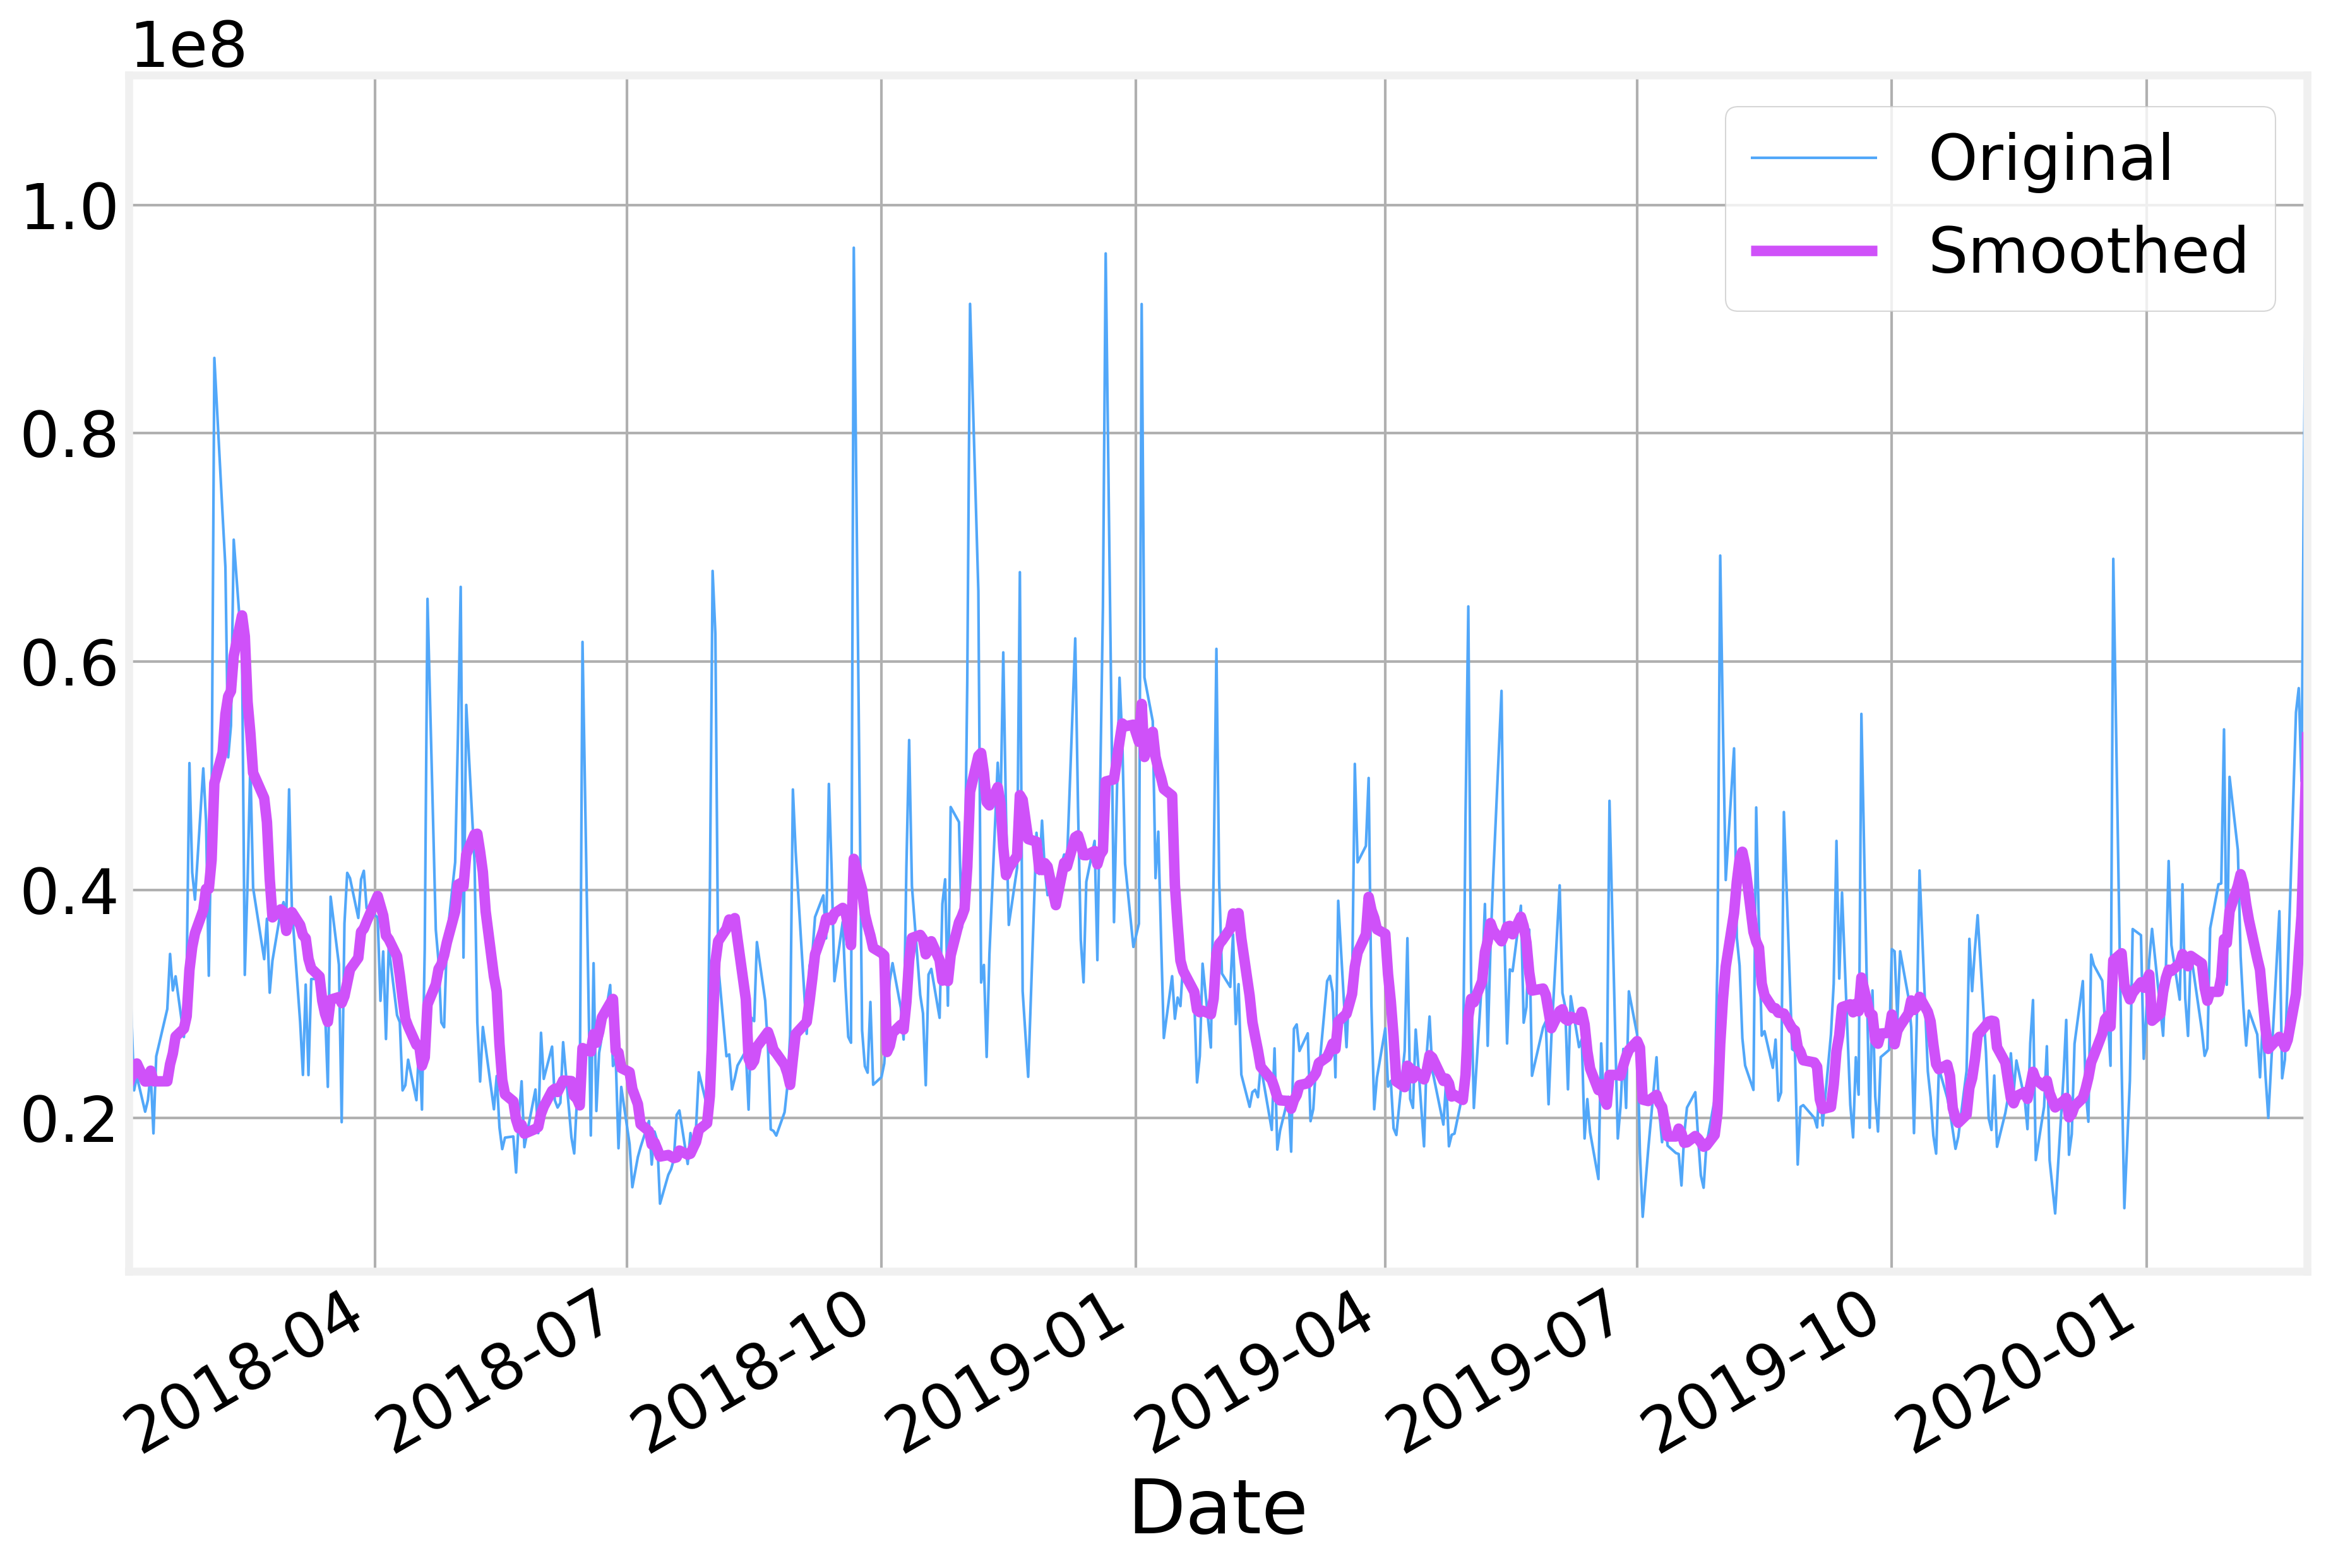

In [28]:
ax = data['2018':].plot(y='Volume', lw=1)
data.rolling(8).mean().dropna()['2018':].plot(y='Volume', ax=ax)
ax.legend(['Original', 'Smoothed'])

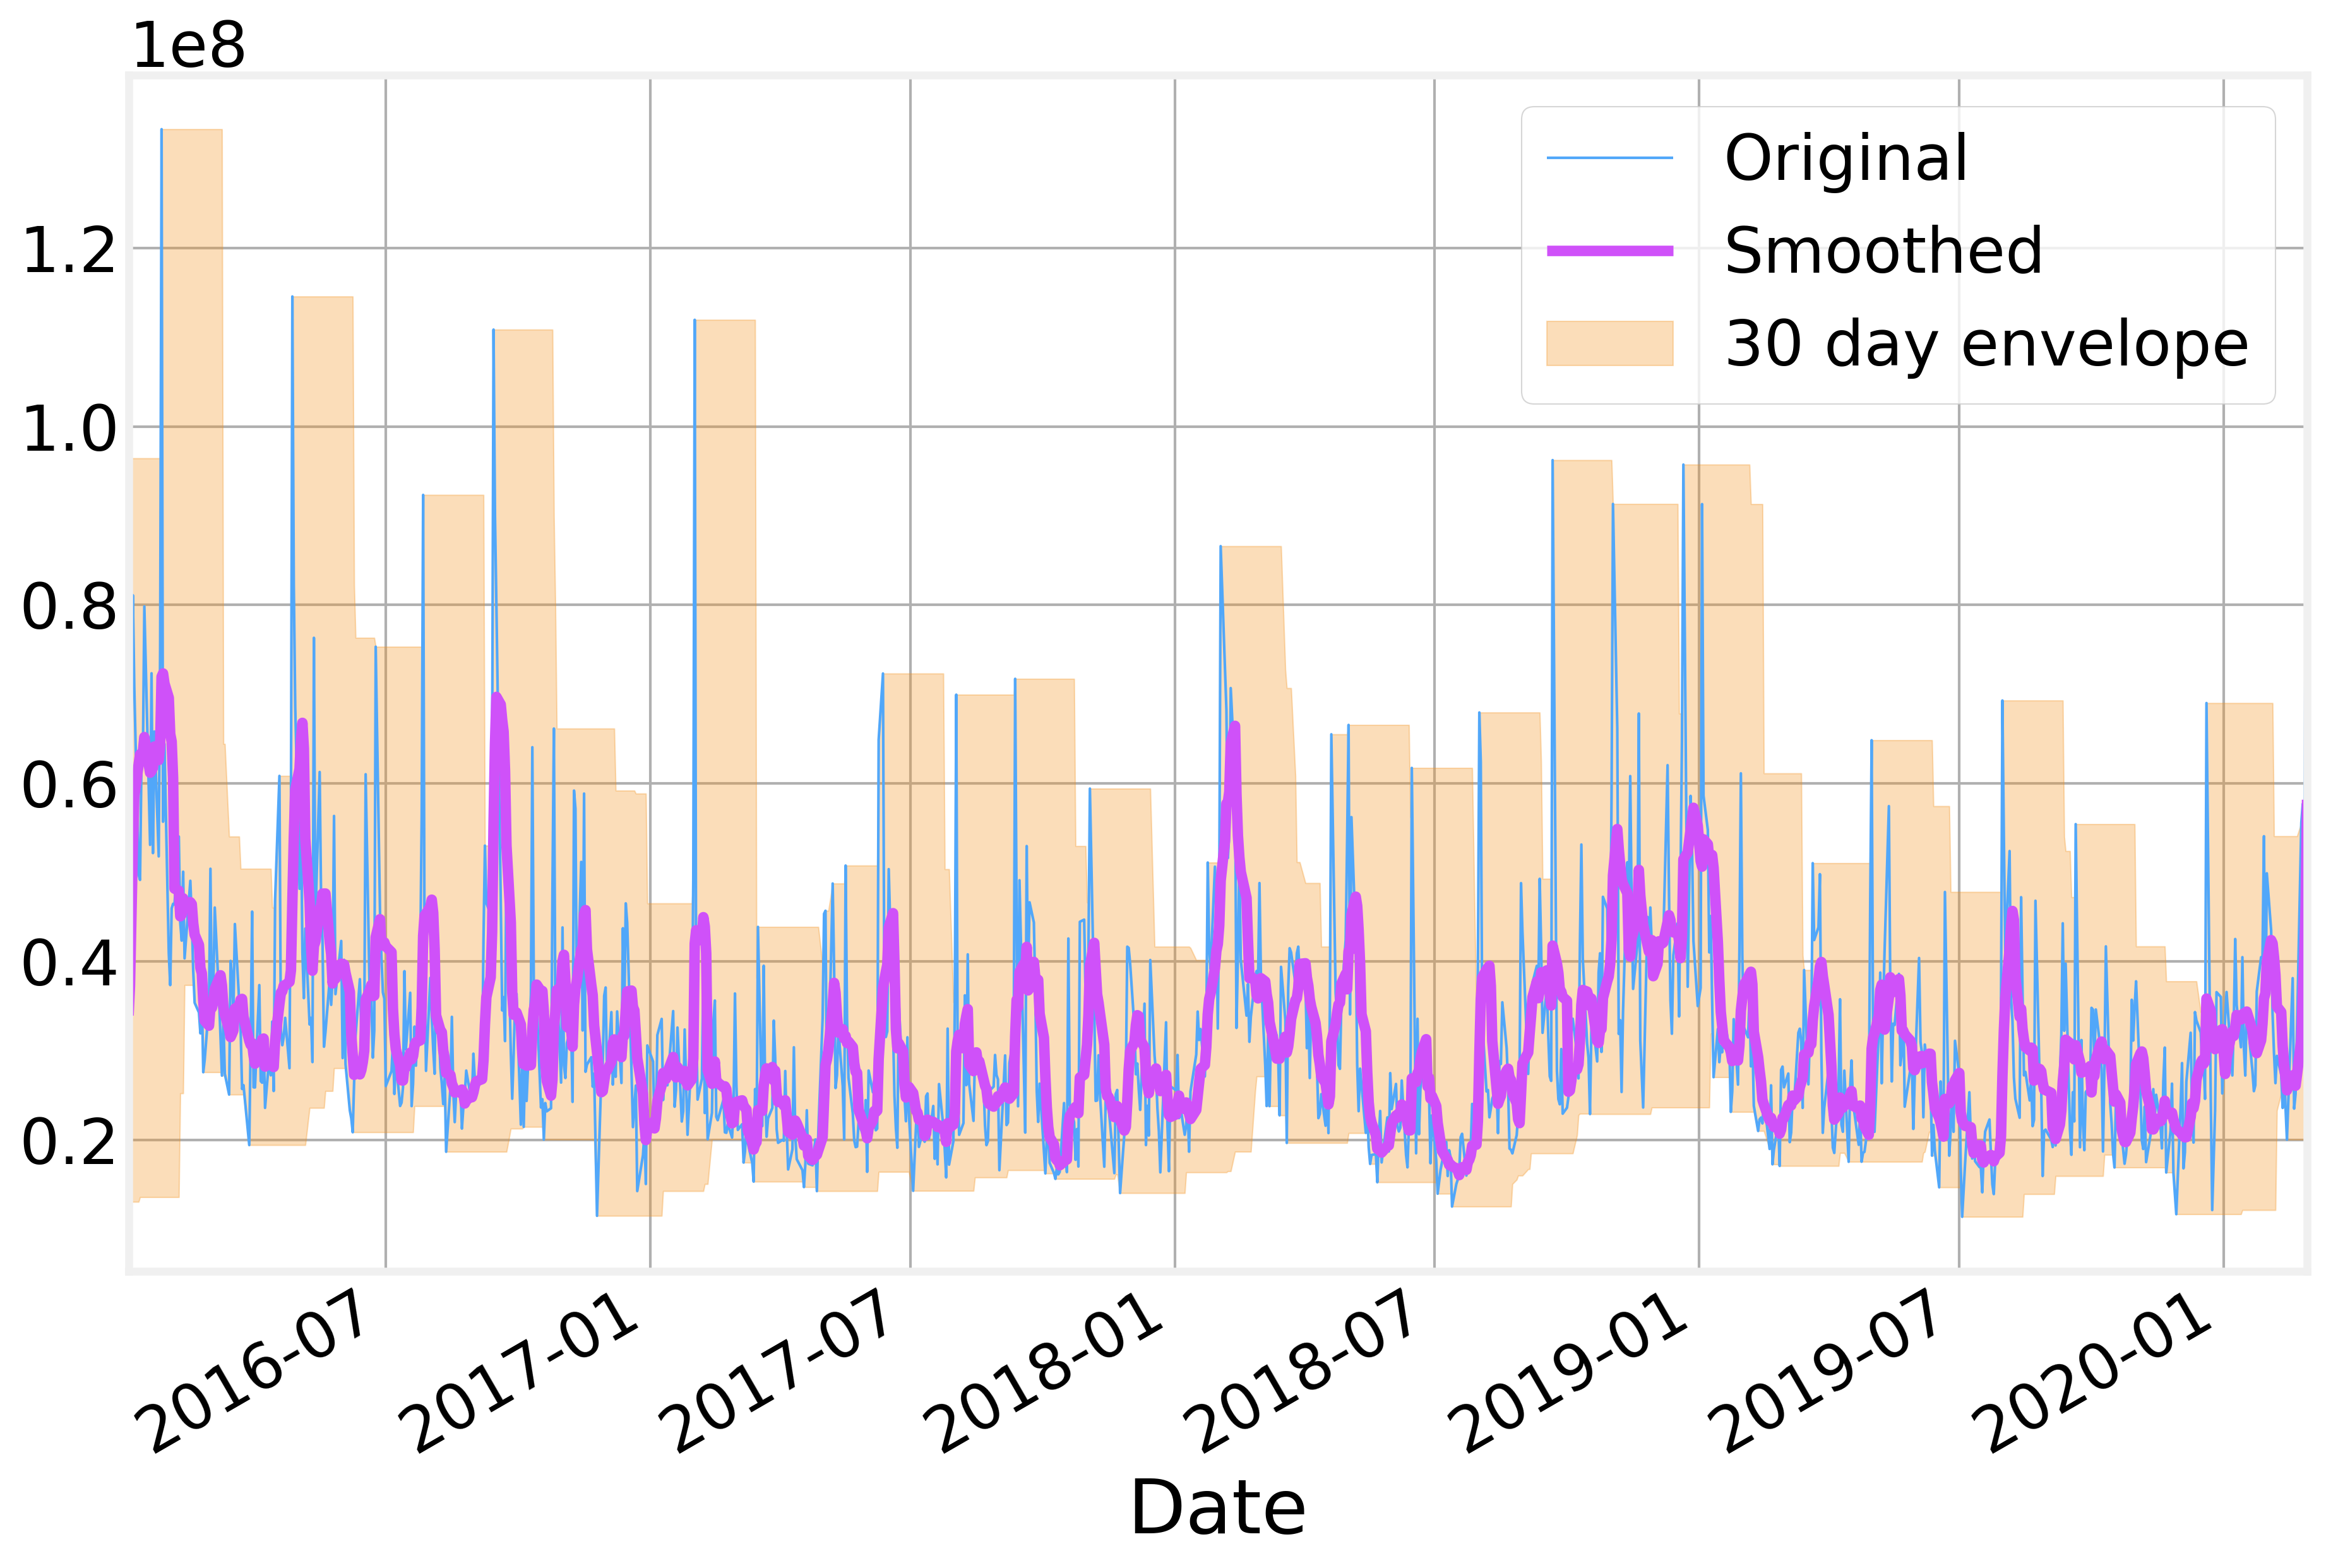

In [6]:

upper_limit = data.rolling(30).max().dropna()['2016':]
lower_limit = data.rolling(30).min().dropna()['2016':]

ax = data['2016':].plot(y='Volume', lw=1)
data.rolling(7).mean().dropna()['2016':].plot(y='Volume', ax=ax)
ax.fill_between(x=data['2016':].index, y1=upper_limit['Volume'], y2=lower_limit['Volume'], color=colors[3], alpha=0.3)
ax.legend(['Original', 'Smoothed', '30 day envelope'])

# GroupBy For the movies file

In [7]:
#Here I import the xlsx file using the read.excel function
df = pd.read_excel('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/movies.xlsx', index_col='Title')
df.head(10)

Year  \
Title                                                     
Intolerance: Love's Struggle Throughout the Ages   1916   
Over the Hill to the Poorhouse                     1920   
The Big Parade                                     1925   
Metropolis                                         1927   
Pandora's Box                                      1929   
The Broadway Melody                                1929   
Hell's Angels                                      1930   
A Farewell to Arms                                 1932   
42nd Street                                        1933   
She Done Him Wrong                                 1933   

                                                                                 Genres  \
Title                                                                                     
Intolerance: Love's Struggle Throughout the Ages                      Drama|History|War   
Over the Hill to the Poorhouse                                              Crime|Drama   
The Big Parade                                                        Drama|Romance|War   
Metropolis                                                                 Drama|Sci-Fi   
Pandora's Box                                                       Crime|Drama|Romance   
The Broadway Melody                                                     Musical|Romance   
Hell's Angels                                                                 Drama|War   
A Farewell to Arms                                                    Drama|Romance|War   
42nd Street                                                      Comedy|Musical|Romance   
She Done Him Wrong                                 Comedy|Drama|History|Musical|Romance   

                                                  Language  Country  \
Title                                                                 
Intolerance: Love's Struggle Throughout the Ages       NaN      USA   
Over the Hill to the Poorhouse                         NaN      USA   
The Big Parade                                         NaN      USA   
Metropolis                                          German  Germany   
Pandora's Box                                       German  Germany   
The Broadway Melody                                English      USA   
Hell's Angels                                      English      USA   
A Farewell to Arms                                 English      USA   
42nd Street                                        English      USA   
She Done Him Wrong                                 English      USA   

                                                  Content Rating  Duration  \
Title                                                                        
Intolerance: Love's Struggle Throughout the Ages       Not Rated       123   
Over the Hill to the Poorhouse                               NaN       110   
The Big Parade                                         Not Rated       151   
Metropolis                                             Not Rated       145   
Pandora's Box                                          Not Rated       110   
The Broadway Melody                                       Passed       100   
Hell's Angels                                             Passed        96   
A Farewell to Arms                                       Unrated        79   
42nd Street                                              Unrated        89   
She Done Him Wrong                                      Approved        66   

                                                   Aspect Ratio     Budget  \
Title                                                                        
Intolerance: Love's Struggle Throughout the Ages           1.33   385907.0   
Over the Hill to the Poorhouse                             1.33   100000.0   
The Big Parade                                             1.33   245000.0   
Metropolis                                                 1.33  6000

In [8]:
df[['Year', 'Country']].groupby('Year').count()


Country
Year         
1916        1
1920        1
1925        1
1927        1
1929        2
1930        1
1932        1
1933        2
1934        1
1935        1
1936        2
1937        2
1938        2
1939        3
1940        5
1941        1
1942        2
1943        1
1944        1
1945        4
1946        3
1947        3
1948        3
1949        2
1950        1
1951        3
1952        4
1953        4
1954        5
1955        2
...       ...
1970       12
1971       11
1972        9
1973        9
1974        9
1975        6
1976       10
1977       16
1978       16
1979       16
1980       24
1981       33
1982       30
1983       22
1984       31
1985       29
1986       26
1987       32
1988       31
1989       33
1990       30
1991       31
1992       34
1993       48
1994       54
1995       70
1996       99
1997      118
1998      134
1999      168

[74 rows x 1 columns]

In [9]:
df[['Gross Earnings', 'Year']].groupby('Year').sum()


Gross Earnings
Year                
1916    0.000000e+00
1920    3.000000e+06
1925    0.000000e+00
1927    2.643500e+04
1929    2.817950e+06
1930    0.000000e+00
1932    0.000000e+00
1933    2.300000e+06
1934    0.000000e+00
1935    3.000000e+06
1936    1.632450e+05
1937    1.849255e+08
1938    0.000000e+00
1939    2.208579e+08
1940    1.607000e+08
1941    0.000000e+00
1942    1.027972e+08
1943    0.000000e+00
1944    0.000000e+00
1945    0.000000e+00
1946    4.405000e+07
1947    7.927000e+03
1948    2.956000e+06
1949    0.000000e+00
1950    8.000000e+06
1951    0.000000e+00
1952    3.600000e+07
1953    4.100000e+07
1954    9.869061e+06
1955    0.000000e+00
...              ...
1970    4.180000e+07
1971    1.089882e+08
1972    1.350024e+08
1973    5.145976e+08
1974    3.853706e+08
1975    3.732292e+08
1976    1.422352e+08
1977    7.440357e+08
1978    7.154223e+08
1979    4.450570e+08
1980    8.654590e+08
1981    7.048333e+08
1982    1.200601e+09
1983    9.826934e+08
1984    1.447611e+09
1985    8.883470e+08
1986    1.110912e+09
1987    1.247231e+09
1988    1.235711e+09
1989    1.639389e+09
1990    2.189711e+09
1991    1.615335e+09
1992    2.164617e+09
1993    2.083896e+09
1994    3.147970e+09
1995    3.098757e+09
1996    3.994197e+09
1997    5.196078e+09
1998    4.950634e+09
1999    6.319981e+09

[74 rows x 1 columns]

# Pivot tables to manipulate the DataFrame

In [10]:
pd.pivot_table(df, index='Year', values='Budget', aggfunc=np.median)


Budget
Year            
1916    385907.0
1920    100000.0
1925    245000.0
1927   6000000.0
1929    379000.0
1930   3950000.0
1932    800000.0
1933    319500.0
1934    325000.0
1935    609000.0
1936   1350000.0
1937   2000000.0
1938   1822368.0
1939   2800000.0
1940   1947000.0
1941   1250000.0
1942    950000.0
1943   2627000.0
1944   2361000.0
1945   1696377.0
1946   3180000.0
1947   2300000.0
1948   3350000.0
1949   1300000.0
1950   3768785.0
1951   2295429.0
1952   2540800.0
1953   1450000.0
1954   5000000.0
1955   1200000.0
...          ...
1970   7358473.0
1971   2250000.0
1972   1700000.0
1973   4638783.0
1974   2600000.0
1975   4700000.0
1976   3800000.0
1977  10000000.0
1978   6000000.0
1979  11500000.0
1980  10000000.0
1981  10500000.0
1982  11000000.0
1983  11000000.0
1984  10000000.0
1985  12000000.0
1986  14400000.0
1987  13000000.0
1988  12500000.0
1989  15000000.0
1990  26000000.0
1991  20000000.0
1992  25000000.0
1993  15000000.0
1994  25000000.0
1995  28000000.0
1996  25765000.0
1997  29500000.0
1998  25000000.0
1999  22000000.0

[74 rows x 1 columns]

In [11]:
pd.pivot_table(df, index='Year', values='Budget', aggfunc=np.mean)


Budget
Year              
1916  3.859070e+05
1920  1.000000e+05
1925  2.450000e+05
1927  6.000000e+06
1929  3.790000e+05
1930  3.950000e+06
1932  8.000000e+05
1933  3.195000e+05
1934  3.250000e+05
1935  6.090000e+05
1936  1.350000e+06
1937  2.000000e+06
1938  1.822368e+06
1939  2.759000e+06
1940  1.945500e+06
1941  1.250000e+06
1942  9.500000e+05
1943  2.627000e+06
1944  2.361000e+06
1945  1.702126e+06
1946  4.426667e+06
1947  2.503000e+06
1948  3.350000e+06
1949  1.300000e+06
1950  3.768785e+06
1951  3.906143e+06
1952  2.430267e+06
1953  2.027500e+06
1954  3.582000e+06
1955  1.200000e+06
...            ...
1970  1.051391e+07
1971  3.432700e+06
1972  2.012222e+06
1973  3.968420e+06
1974  4.185229e+06
1975  4.821596e+06
1976  3.838931e+06
1977  9.863179e+06
1978  1.128333e+07
1979  1.571429e+07
1980  1.599091e+07
1981  1.186172e+07
1982  1.310172e+07
1983  1.587510e+07
1984  1.436855e+07
1985  1.351398e+07
1986  1.400288e+07
1987  1.353387e+07
1988  4.906129e+07
1989  1.835939e+07
1990  3.238824e+07
1991  2.517655e+07
1992  2.598203e+07
1993  2.072979e+07
1994  2.901377e+07
1995  3.277500e+07
1996  3.162061e+07
1997  5.942449e+07
1998  4.046000e+07
1999  3.898178e+07

[74 rows x 1 columns]

# General Plotting

In [13]:
#This belongs to the AApl data
data.head(8)


Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400.0
1980-12-19  0.504464  0.506696  0.504464  0.504464   0.399707   12157600.0
1980-12-22  0.529018  0.531250  0.529018  0.529018   0.419162    9340800.0
1980-12-23  0.551339  0.553571  0.551339  0.551339   0.436848   11737600.0

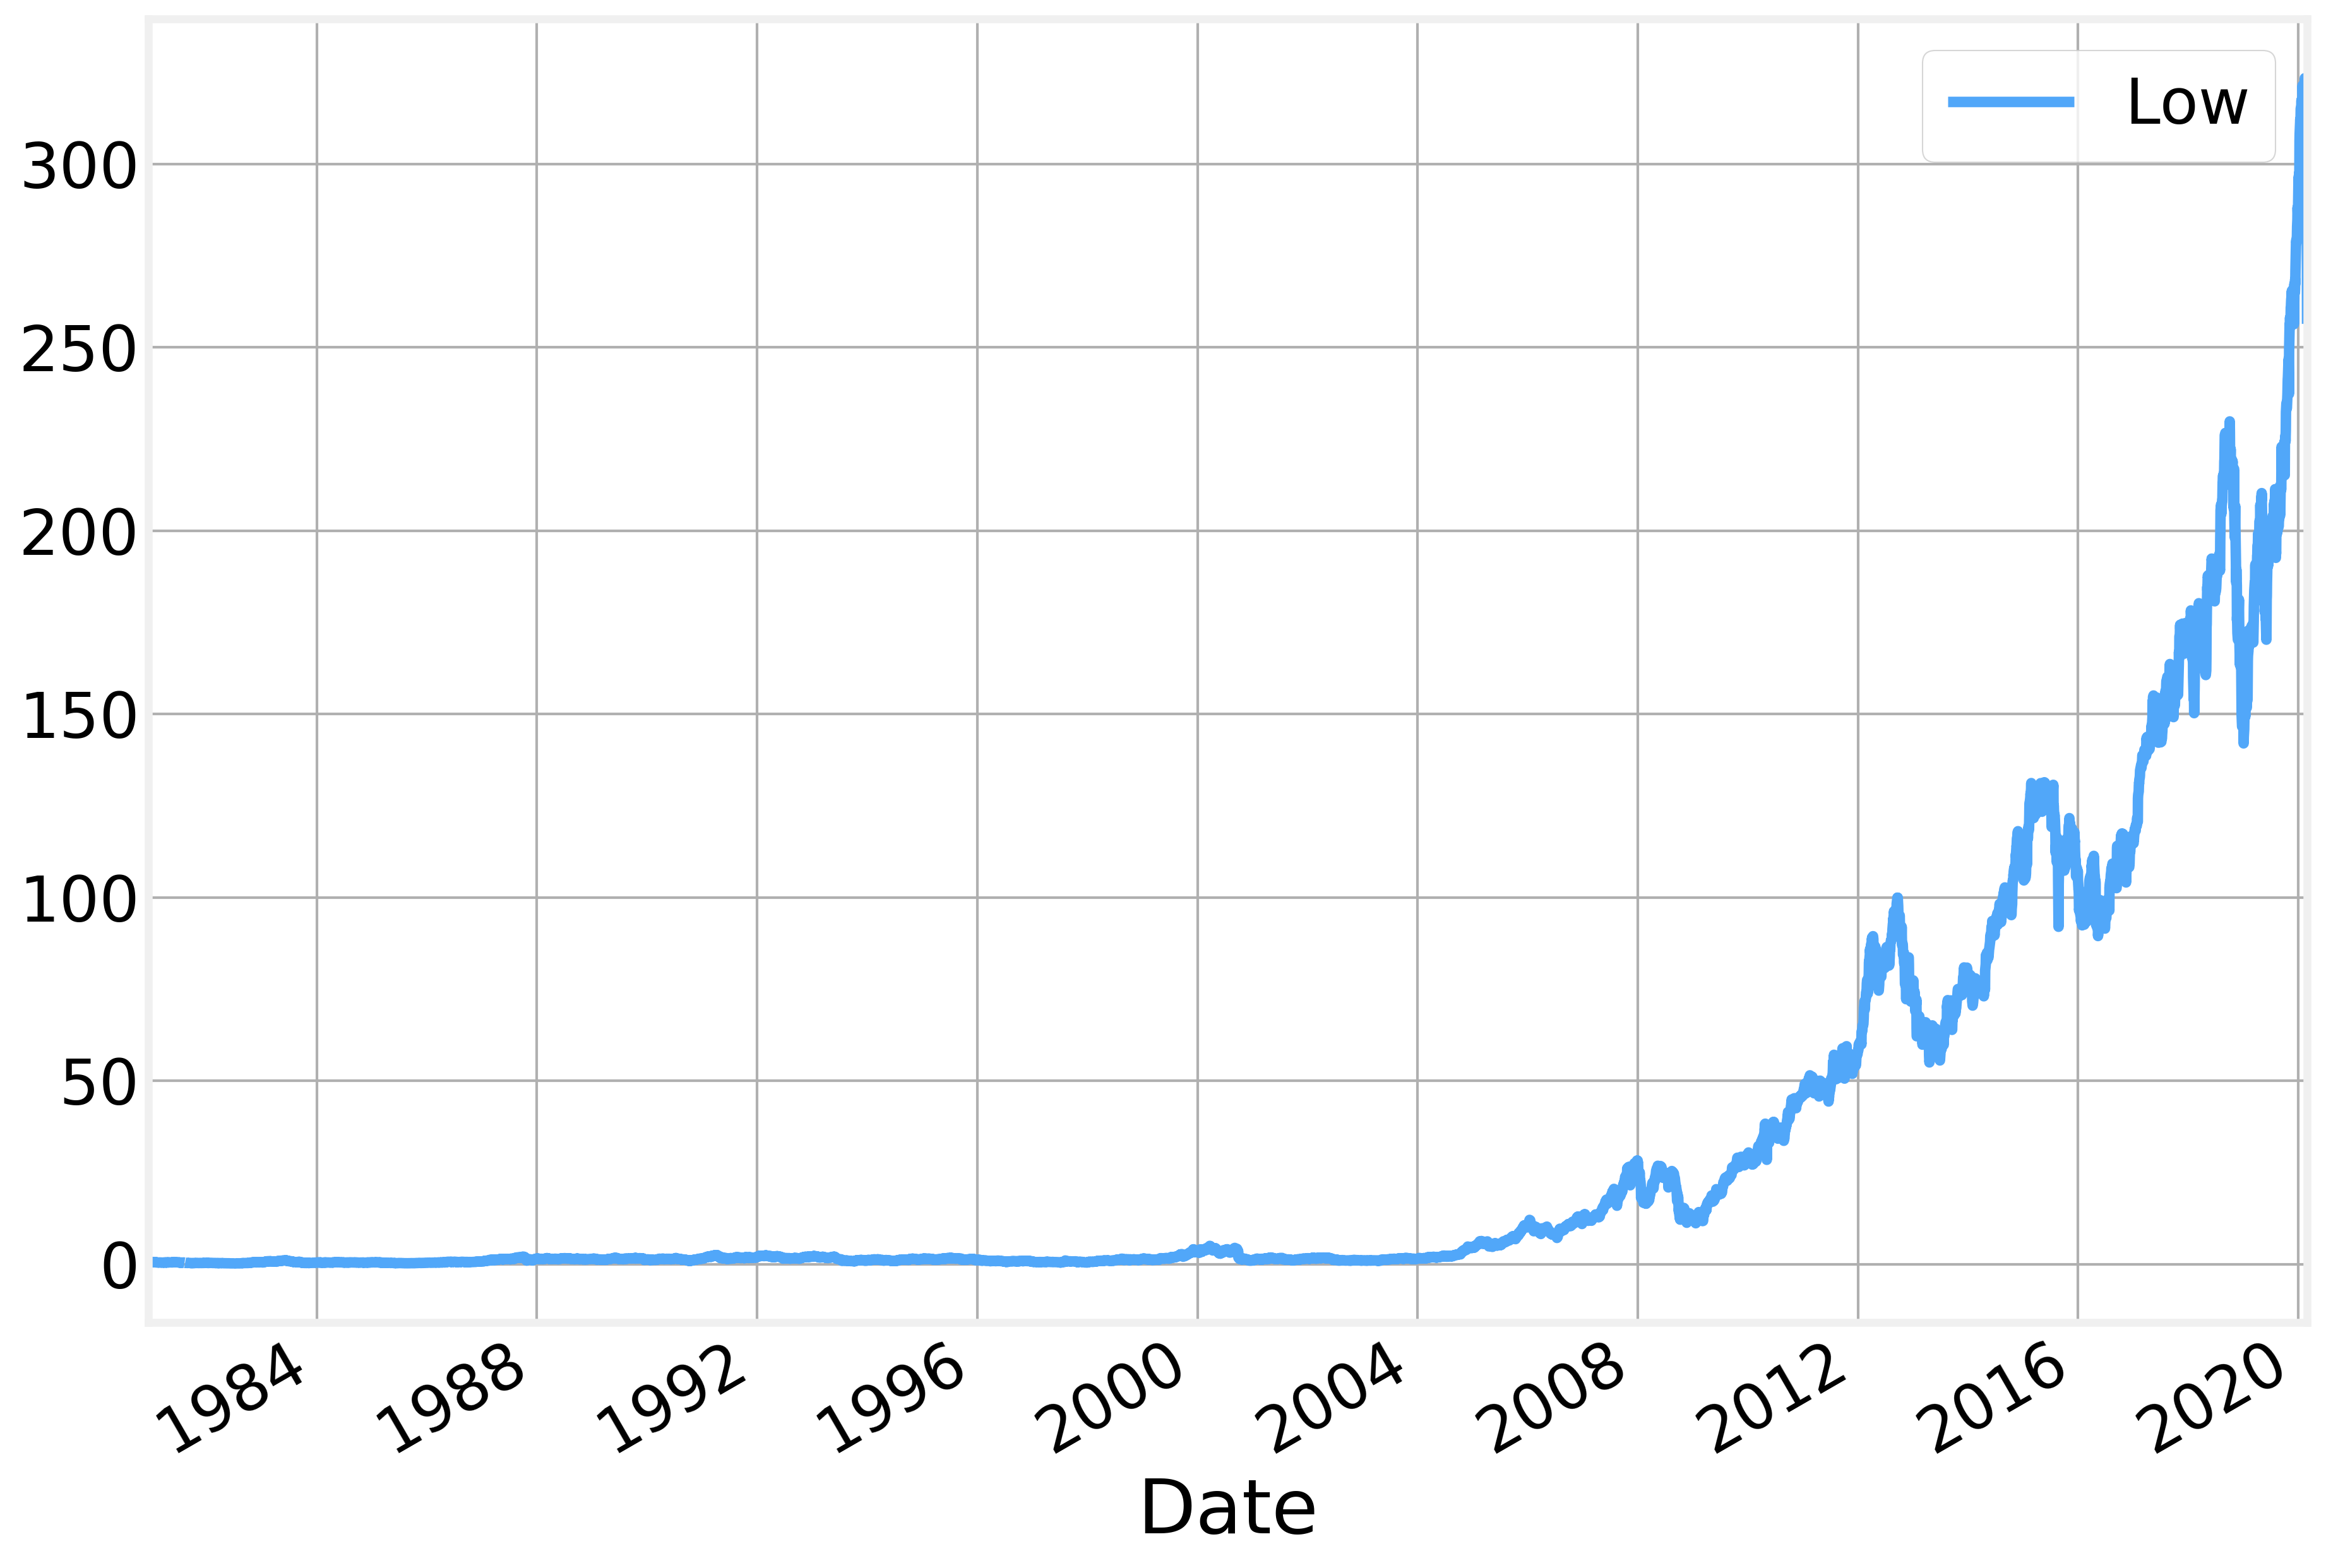

In [14]:
data.plot(y='Low')


C:\Users\Abhishek Nagrecha\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)
C:\Users\Abhishek Nagrecha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


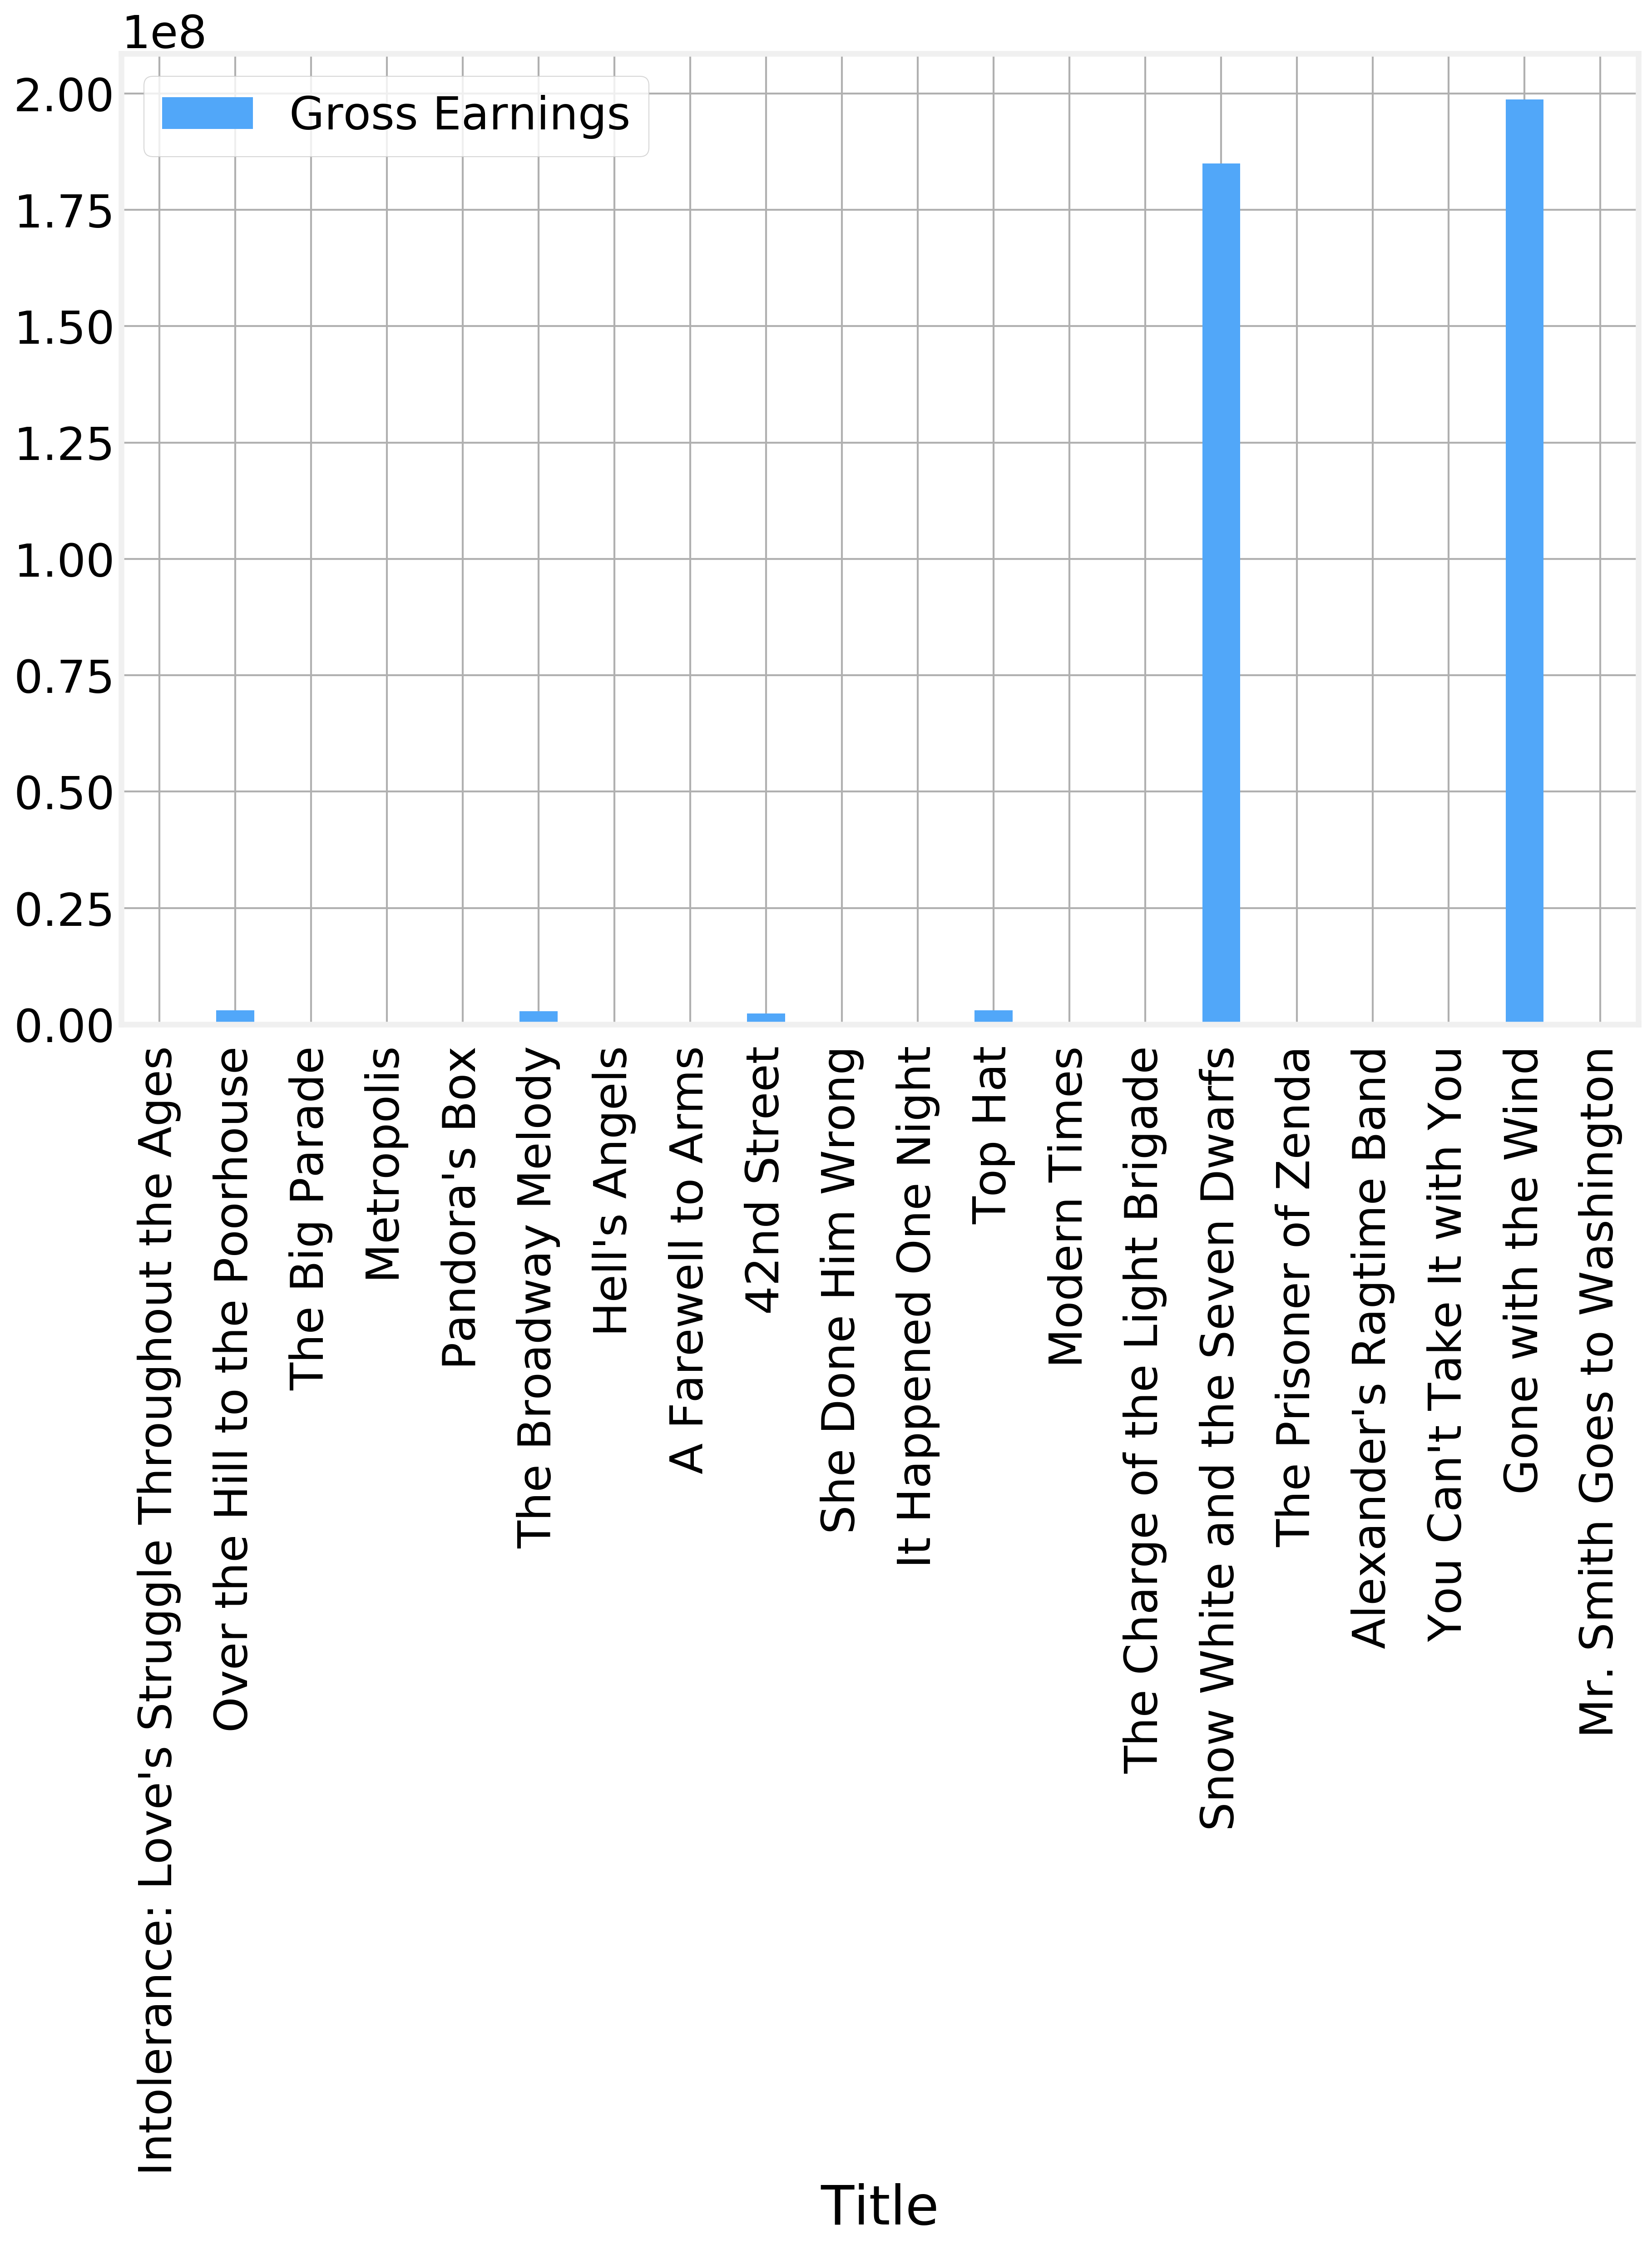

In [15]:
#Now here I used bar graphs
df.iloc[:20].plot.bar(y='Gross Earnings')


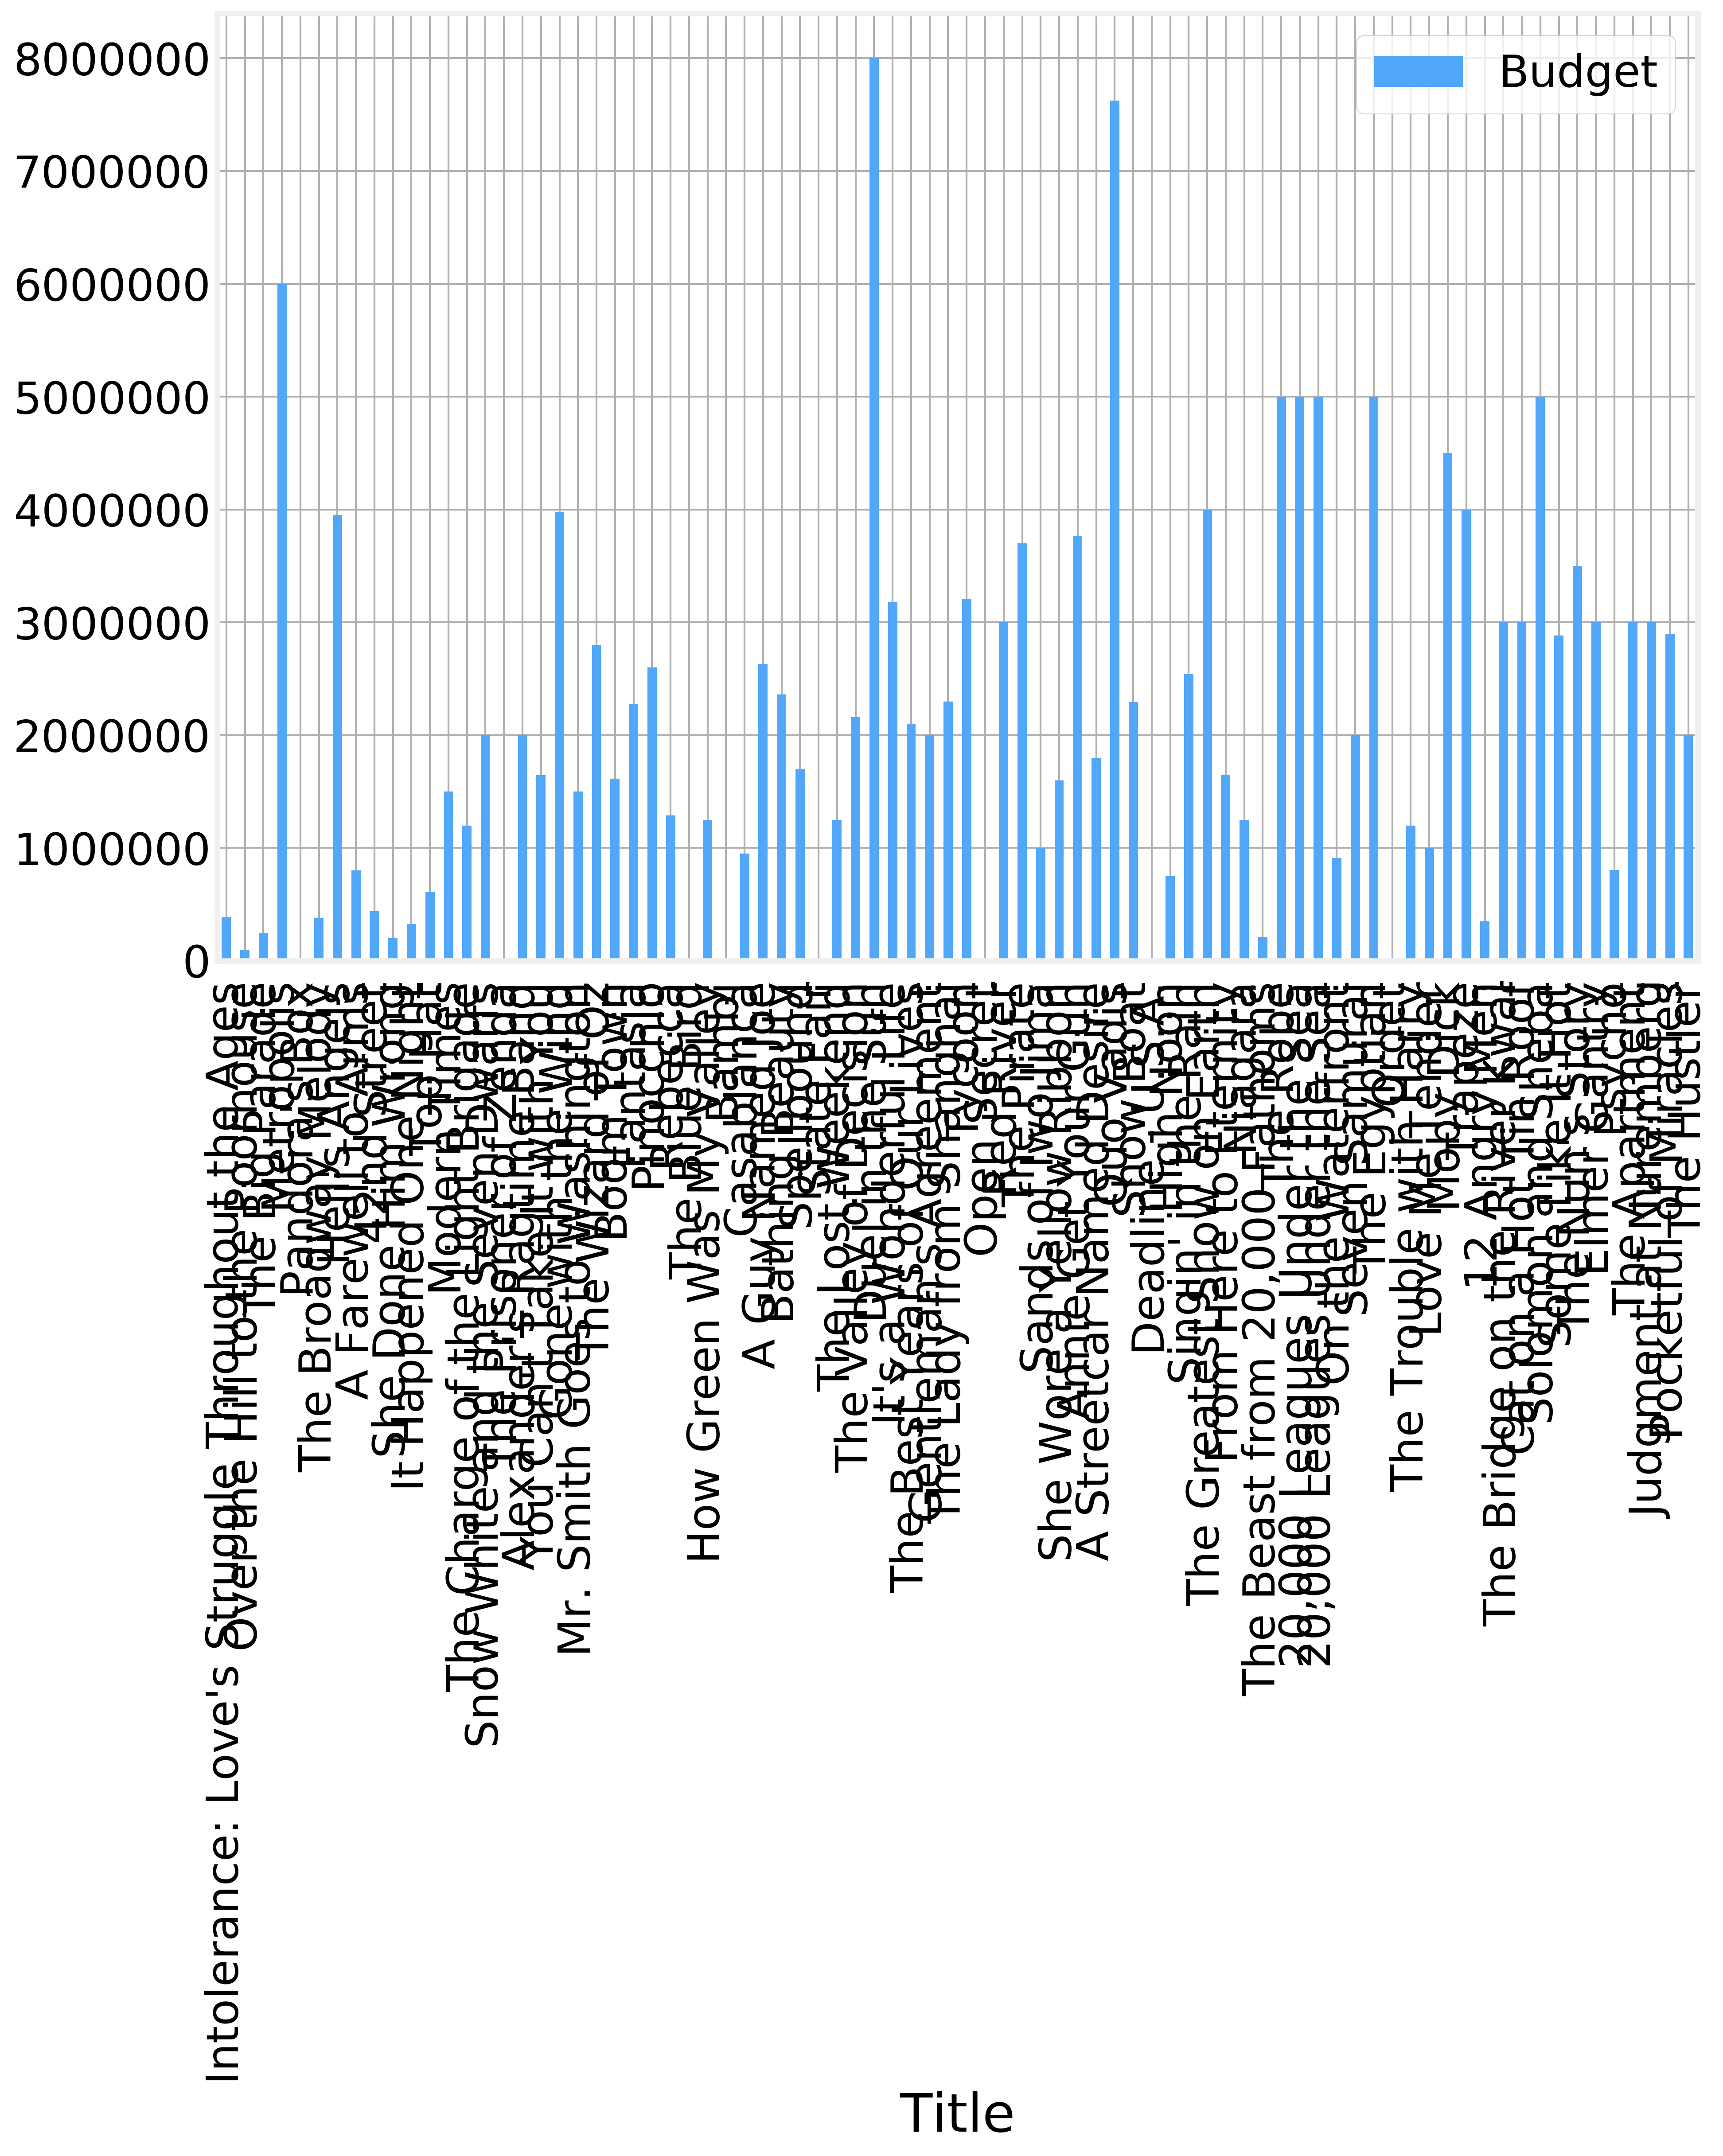

In [17]:
df.iloc[:80].plot.bar(y='Budget')


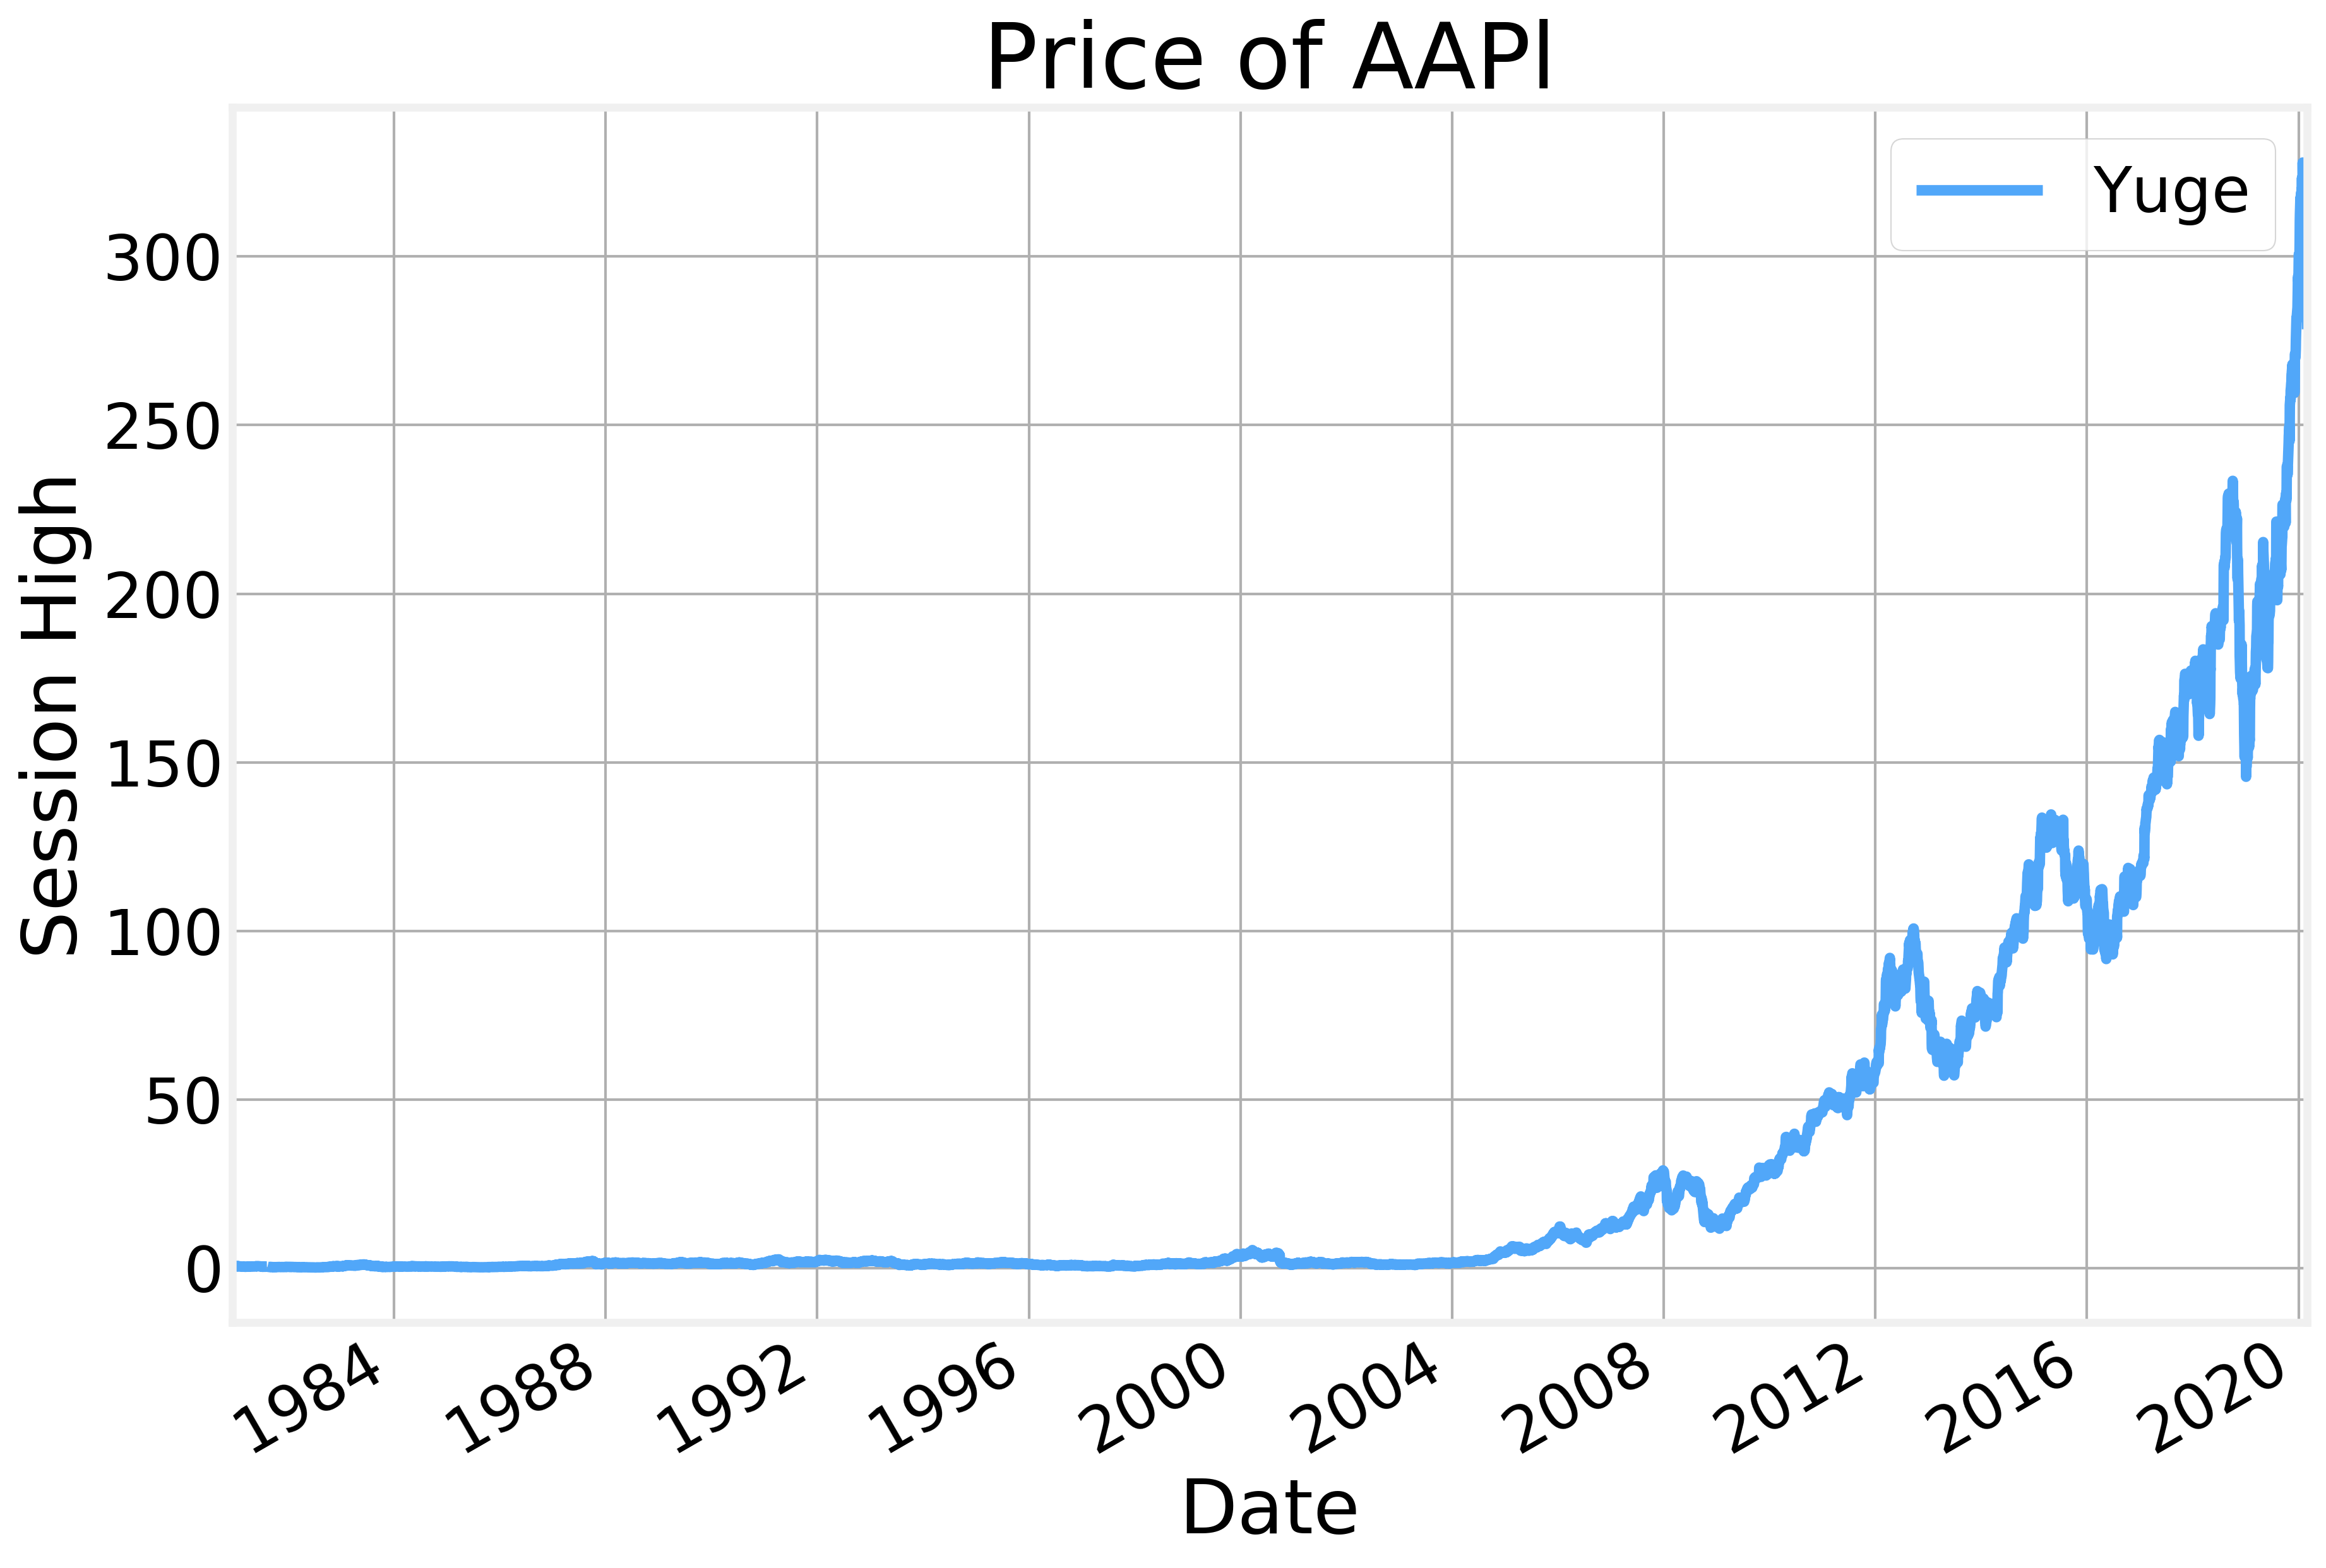

In [19]:
ax = data.plot(y='High')
ax.set_ylabel('Session High')
ax.set_xlabel('Date')
ax.set_title('Price of AAPl')
ax.legend(['Yuge'])

In [21]:
#Simple Linear Regression
data = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/Anscombe1.dat', header=None, sep=' ')
data.head(10)

0      1
0  10.0   8.04
1   8.0   6.95
2  13.0   7.58
3   9.0   8.81
4  11.0   8.33
5  14.0   9.96
6   6.0   7.24
7   4.0   4.26
8  12.0  10.84
9   7.0   4.82

In [24]:

lr = LinearRegression()
lr.fit(data[[0]], data[[1]])
lr.coef_


array([[0.50009091]])

In [25]:
lr.intercept_


array([3.00009091])

Text(0, 0.5, 'Y')

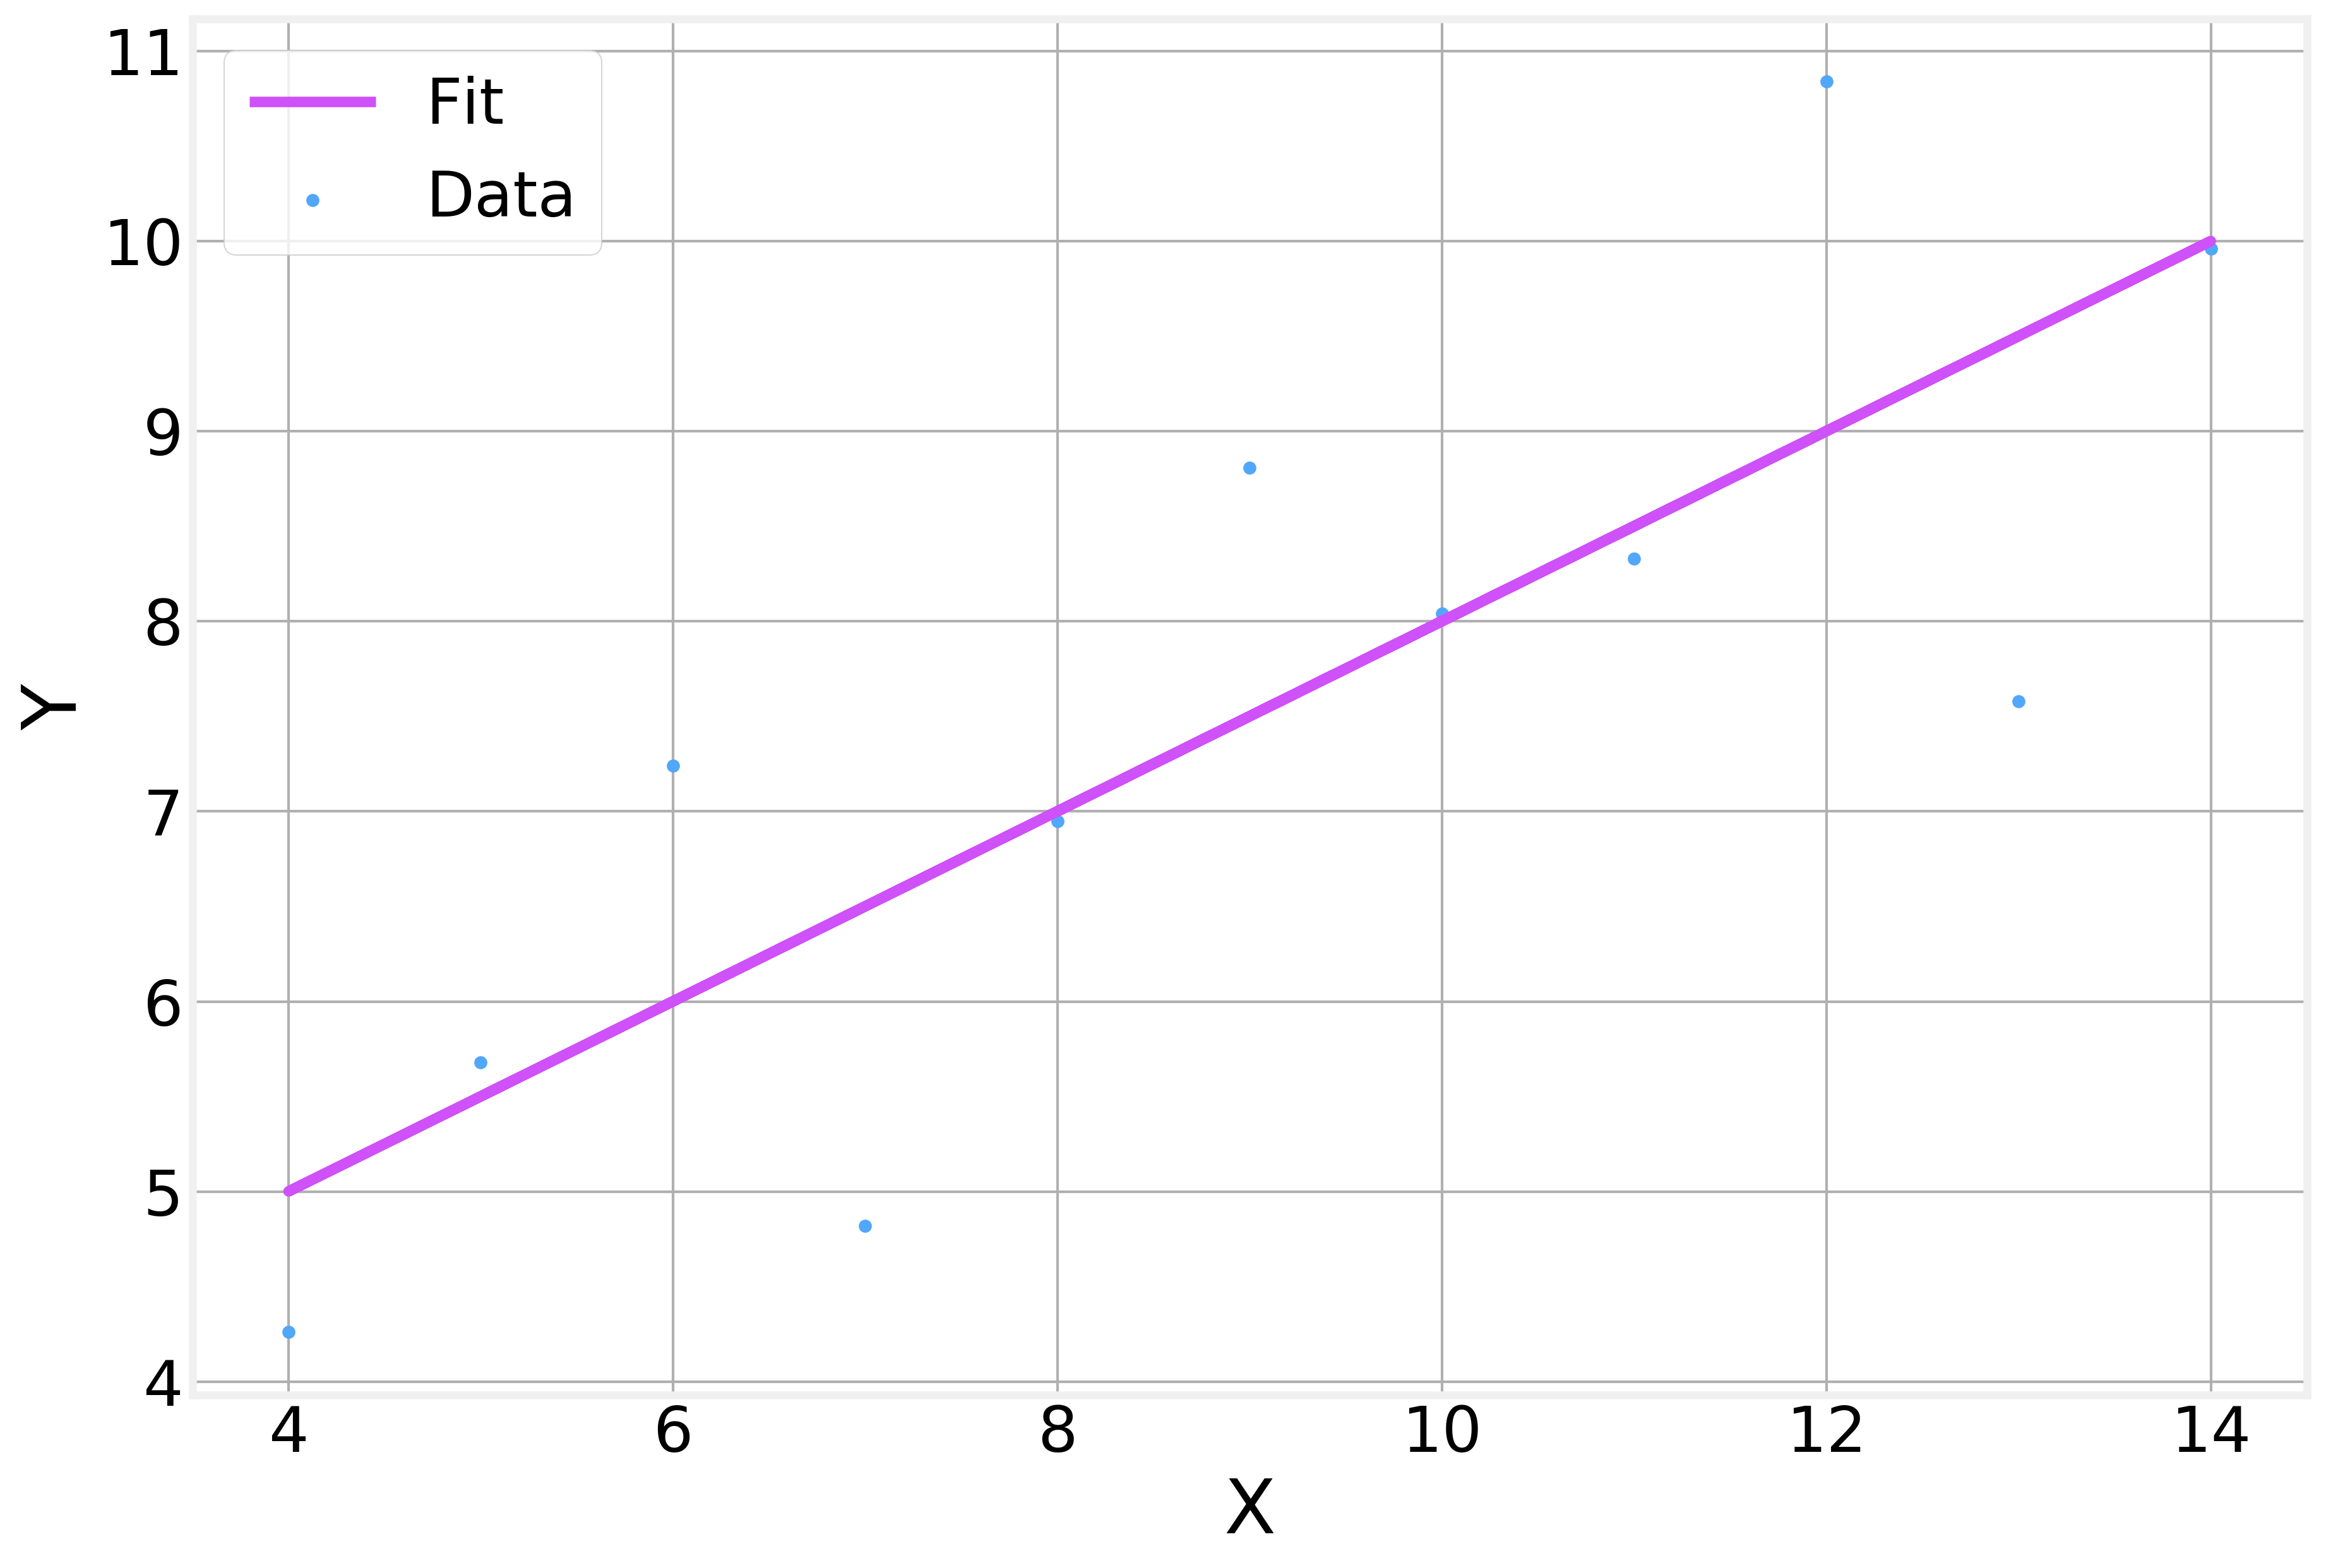

In [26]:
y_ = lr.predict(data[[0]])

ax = data.plot.scatter(x=0, y=1)
ax.plot(data[0], y_, c=colors[1])
ax.legend(['Fit', 'Data'])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Create an empty workbook

In [31]:
book = openpyxl.Workbook()
book.sheetnames


['Sheet']

In [32]:
sheet = book.active
print(sheet)

<Worksheet "Sheet">


In [33]:
#Here I rename the workbook
sheet.title = 'My First Sheet'
book.sheetnames



['My First Sheet']

In [34]:
#lets check it dimensions
sheet.dimensions


'A1:A1'

In [57]:
#lets add some data here
sheet['A3'] = "This is My"
sheet['B2'] = "Very First"
sheet['B3'] = "Work Sheet"
sheet['B4'] = "Open it"

sheet.dimensions


'A2:B5'

In [58]:
rows = np.arange(20).reshape(10, 2)
print(rows)



[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [59]:
for row in rows:
    sheet.append(list(row))
sheet.dimensions
    

'A2:B15'

In [60]:
#Save the created work book
book.save('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/My-First-Work-Book.xlsx')


In [61]:
#TO load the saved workbook
book = openpyxl.load_workbook('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/Simple.xlsx')
book.sheetnames



['My Data']

In [62]:
print(sheet.dimensions)
print("Min row: %u Max row: %u" % (sheet.min_row, sheet.max_row))
print("Min col: %u Max col: %u" % (sheet.min_column, sheet.max_column))

A2:B15
Min row: 2 Max row: 15
Min col: 1 Max col: 2


In [63]:
for c1, c2 in sheet[sheet.dimensions]:
    print(c1.value, c2.value)

None Very First
This is My Work Sheet
None Open it
None My Second Work Sheet
0 1
2 3
4 5
6 7
8 9
10 11
12 13
14 15
16 17
18 19


# Adding & Removing Sheets

In [64]:
sheet = book.create_sheet(title="My Second Work Sheet", index=0)
book.sheetnames


['My Second Work Sheet', 'My Data']

In [65]:

sheet["B4"] = "Check Out"
sheet["B5"] = "My Second Work Sheet"

book.save("C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/Simple2.xlsx")

#Remove the 1900s movie sheet from the xlsx file

book = openpyxl.load_workbook("C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/movies.xlsx")

book.sheetnames


['1900s', '2000s', '2010s', '3000s']

In [66]:
book.remove(book["1900s"])
book.sheetnames


['2000s', '2010s', '3000s']

In [67]:
book.save('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/movies2.xlsx')
